## 3. Active Learning Exercises

We now have the data of top 100 songs in USA throughout 2021 on these two platforms. With these datasets we can explore the trends, popularity, and differences in the music industry. In this part of active learning exercises we want to prompt and answer some possible analysis. Here are three learning exercises.

In [66]:
# import required library for the exercises
import os
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

### Q1: What is the popularity of different artists in the Top 100 on both Spotify and Billboard? 

WordCloud is a good choice to visualize the popularity of the artist. First, we count the frequency of artists appearing in the Top 100 on both Spotify and Billboard. Then we visualize the result by WordCloud.

#### （1）Spotify Platform 

In [67]:
# Function to visualize word counts using a WordCloud
def visualize_word_counts(counts):
    # Create a WordCloud object with specified parameters
    wc = WordCloud(max_font_size=130, min_font_size=25, colormap='tab20', background_color='white', 
                   prefer_horizontal=.95, width=2100, height=700, random_state=0)
    # Generate WordCloud from word frequencies
    cloud = wc.generate_from_frequencies(counts)
    # Set up the figure for displaying the WordCloud
    plt.figure(figsize=(18,15))
    # Display the WordCloud image using bilinear interpolation
    plt.imshow(cloud, interpolation='bilinear')
    # Turn off axis labels for better visualization
    plt.axis('off')
    # Show the WordCloud plot
    plt.show()

First iterates through all the csv files in the specified folder, then reads them one by one and appends them to a new DataFrame. Next, the split function is used to split the filenames and take the 3rd-to-last part. Then, a '-' is used to concatenate these parts to form a date string. This date string is added to the 'date' column of the DataFrame.

In [68]:
usecols = ['rank', 'uri', 'artist_names', 'track_name', 'source', 'peak_rank', 'previous_rank', 'weeks_on_chart', 'streams']
folder_path = 'C:/Users/dudud/collecting data/Group Project/2021_song_data/spotify_weekly_chart/Dataset_US'

# Initialize an empty list to store the DataFrames
dataframes = []

# Iterate through all CSV files in the specified folder
for file_name in os.listdir(folder_path):
    # Check if the file has a CSV extension
    if file_name.endswith('.csv'):
        # Construct the full path to the CSV file
        file_path = os.path.join(folder_path, file_name)
        # Read the CSV file, selecting specific columns using 'usecols'
        df = pd.read_csv(file_path, usecols=usecols)
        # Extract the date from the file name
        date_str = file_name.split('-')[-3:]
        date = '-'.join(date_str).split('.')[0]
        # Add a new 'date' column to the DataFrame
        df['date'] = date
        # Append the DataFrame to the list
        dataframes.append(df)

# Concatenate all DataFrames in the list
merged_data = pd.concat(dataframes, ignore_index=True)


Finally, select the top 100 based on the filter criteria, throw away the unneeded columns, and reset the index.

In [69]:
# Filter the data to include only entries with a rank within the Top 100
top100 = merged_data[(merged_data['rank'] <= 100)]

# Drop unnecessary columns and reset the index for the filtered DataFrame
top100 = top100.reset_index(drop=True)

# Display the resulting DataFrame containing only the Top 100 entries
top100

,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,date
0,1,spotify:track:3YJJjQPAbDT7mGpX3WtQ9A,SZA,Good Days,Top Dawg Entertainment/RCA Records,1,10,2,6323585,2021-01-07
1,2,spotify:track:31qCy5ZaophVA81wtlwLc4,Justin Bieber,Anyone,RBMG/Def Jam,2,-1,1,6149984,2021-01-07
2,3,spotify:track:6Im9k8u9iIzKMrmV7BWtlF,Ariana Grande,34+35,Republic Records,2,2,10,5606876,2021-01-07
3,4,spotify:track:3tjFYV6RSFtuktYl3ZtYcq,"24kGoldn, iann dior",Mood (feat. iann dior),Records/Columbia,2,4,22,5583614,2021-01-07
4,5,spotify:track:7hxHWCCAIIxFLCzvDgnQHX,"Internet Money, Gunna, Don Toliver, NAV",Lemonade (feat. NAV),Internet Money Records / TenThousand Projects,1,5,21,5368252,2021-01-07
...,...,...,...,...,...,...,...,...,...,...
5195,96,spotify:track:6Tof6kPUc2a17GKaKz4IXz,"Thurl Ravenscroft, Boris Karloff","You're A Mean One, Mr. Grinch",WaterTower Music,91,91,9,2217479,2021-12-30
5196,97,spotify:track:285pBltuF7vW8TeWk8hdRR,Juice WRLD,Lucid Dreams,Juice WRLD Mixtape / ISR P&D,1,111,191,2215742,2021-12-30
5197,98,spotify:track:0247StOpd3AkeBQzANX4Zf,Band Aid,Do They Know It's Christmas? - 1984 Version,EMI,19,79,26,2208664,2021-12-30
5198,99,spotify:track:0z5HSQGWgnjdNvwbOmhB2w,Carpenters,Merry Christmas Darling - Remix,A&M,87,87,5,2192550,2021-12-30


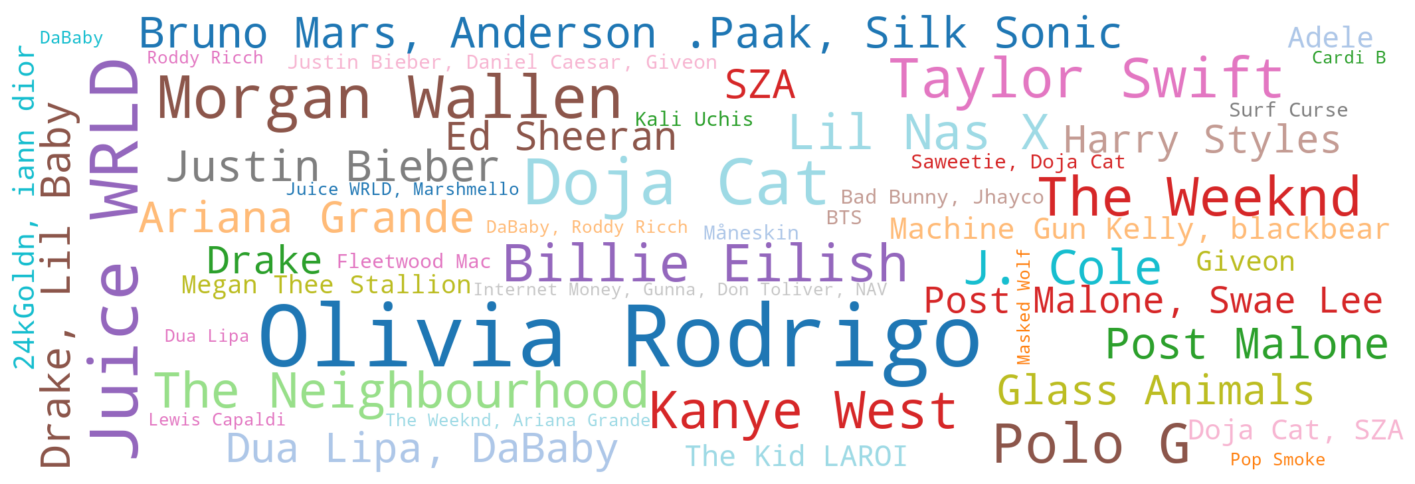

In [70]:
# Count the occurrences of each unique artist name in the 'artist_names' column of the Top 100 DataFrame
counts = top100['artist_names'].value_counts()
# Visualize the word counts using a WordCloud, providing a visualization of artist popularity
visualize_word_counts(counts)

In [71]:
# Print the counts of occurrences for each unique artist name in the 'artist_names' column of the Top 100 DataFrame
print(counts)

Olivia Rodrigo                     263
Juice WRLD                         147
Doja Cat                           133
Morgan Wallen                      115
Taylor Swift                        98
                                  ... 
Lil Wayne, Rich The Kid              1
Kali Uchis, SZA                      1
Meek Mill                            1
Tyler, The Creator, DAISY WORLD      1
Jessica Darrow                       1
Name: artist_names, Length: 453, dtype: int64


In the image above, the names of artists such as Olivia Rodrigo, Juice WRLD, Doja Cat, Morgan Wallen, Taylor Swift and others stand out. In other words,the frequency of these singers appearing on Spotify's Top 100 list is very high. So we draw a conclusion that the most popular artists on Spotify in 2021 were Olivia Rodrigo, Juice WRLD, Doja Cat, Morgan Wallen, Taylor Swift, and so on. 

#### （2）Billboard Platform 

We use a similar approach for Billboard, but since we already have one merged and cleaned CSV file for Billboard, the process is simpler.

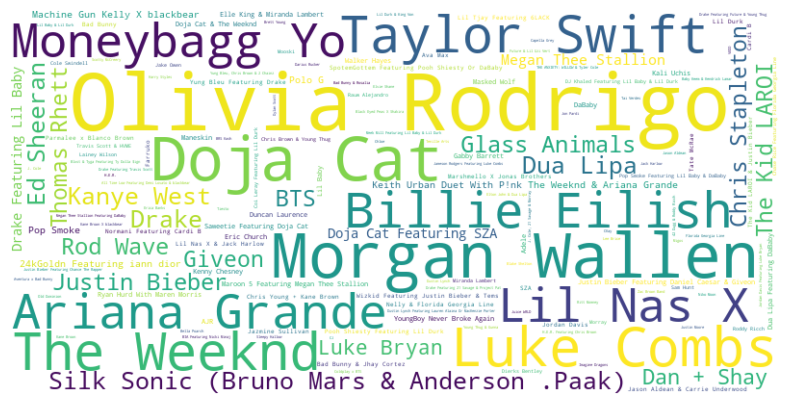

Olivia Rodrigo                    172
Morgan Wallen                     100
Doja Cat                           94
Luke Combs                         72
The Weeknd                         68
                                 ... 
Migos & Cardi B                     1
Carrie Underwood & John Legend      1
The Beach Boys                      1
Halsey                              1
A Boogie Wit da Hoodie              1
Name: artist, Length: 493, dtype: int64


In [72]:
# Read the CSV file into a DataFrame
csv_file_path = 'C:/Users/dudud/collecting data/Group Project/2021_song_data/Billboard 2021.csv'
df = pd.read_csv(csv_file_path)
artist_column = 'artist'

# Extract artist names from the DataFrame
artist_names = df[artist_column].dropna().astype(str)

# Count the frequency of each artist
artist_counts = artist_names.value_counts()

# Generate a word cloud using the artist frequencies
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(artist_counts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Don't show axis
plt.show()

# Display the frequency list
print(artist_counts)

From the result, we can see that the top 5 artists from Billboard in 2021 is Olivia Rodrigo, Morgan Wallen, Doja Cat, Luke Combs, and the Weeknd.

Comparing Spotify and Billboard, we find that artists such as Olivia Rodrigo, Doja Cat and Morgan Wallen appear in both platforms.

### Q2: How long does a song stay in Top 100 on Spotify and Billboard? 

For this exercise, we want to explore how many weeks do songs generally stay on both charts. We want to generate a graph of the duration of stay in those charts. Then let's explore what songs stayed in the Top 100 for the longest long time?

#### (1) Spotify Platform 

In [73]:
# Calculate the number of weeks each song has stayed in the Top 100 chart
n_weeks = top100.groupby(['track_name', 'artist_names']).size().reset_index(name='Number of weeks in Top 100')

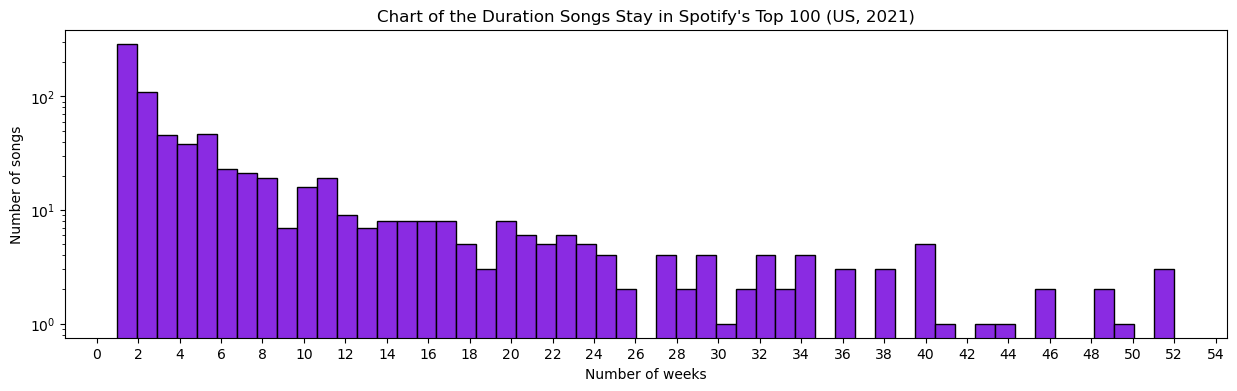

In [74]:
# Visualization of the distribution of the number of weeks songs stay in the Top 100 chart
plt.figure(figsize=(15, 4))
# Create a histogram with specified parameters
plt.hist(n_weeks['Number of weeks in Top 100'], bins=53, color='blueviolet', edgecolor='black', linewidth=1.0)
# Use a logarithmic scale on the y-axis for better visualization of the distribution
plt.yscale('log')
# Set the title of the plot
plt.title("Chart of the Duration Songs Stay in Spotify's Top 100 (US, 2021)")
# Label the x-axis
plt.xlabel('Number of weeks')
# Label the y-axis
plt.ylabel('Number of songs')
# Increase the number of tick marks on the x-axis for better granularity
plt.locator_params(axis='x', nbins=53) 
# Show the plot
plt.show()

Based on the chart above, we can find that most songs just stay 1-8 weeks in Top 100. However, there are still some songs that have been in Top 100 (US, 2021) for almost the whole year, namely 52 weeks.

In [75]:
# Sort the DataFrame 'n_weeks' based on the 'Number of weeks in Top 100' column in descending order
n_weeks.sort_values(by='Number of weeks in Top 100', ascending=False)

,track_name,artist_names,Number of weeks in Top 100
339,Levitating (feat. DaBaby),"Dua Lipa, DaBaby",52
591,Sweater Weather,The Neighbourhood,52
252,Heat Waves,Glass Animals,52
727,drivers license,Olivia Rodrigo,50
83,Blinding Lights,The Weeknd,49
...,...,...,...
360,Love Is A Game,Adele,1
356,Lose,"KSI, Lil Wayne",1
355,Lord I Need You,Kanye West,1
353,Look Who’s Inside Again,Bo Burnham,1


The songs that have been in Top 100 on Spotify (US, 2021) for almost the whole year are: Levitating (feat. DaBaby) (52 weeks), Sweater Weather (52 weeks), Heat Waves (52 weeks), drivers license (50 weeks), Blinding Lights (49 weeks).

#### (2) Billboard Platform


In [76]:
# Calculate the number of weeks each song has stayed in the Top 100 chart
n_weeks = df.groupby(['song', 'artist']).size().reset_index(name='Number of weeks in Top 100')

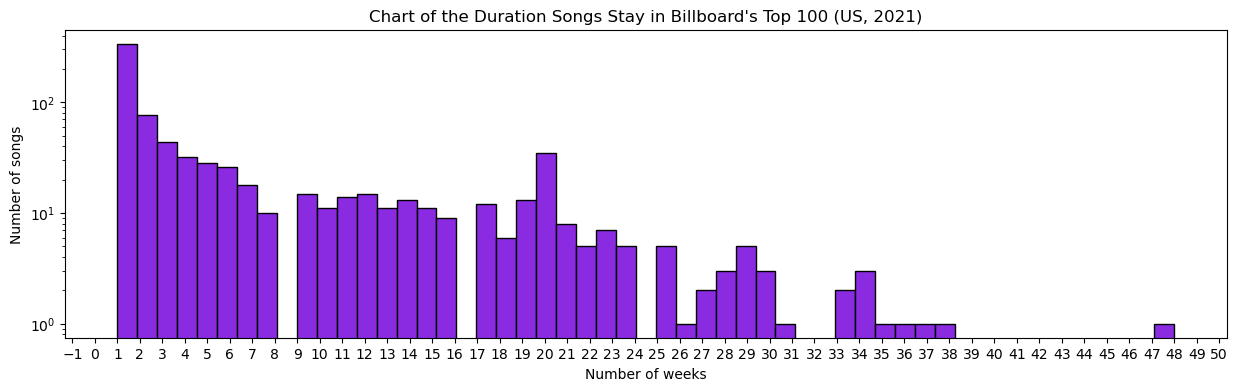

In [77]:
# Visualization of the distribution of the number of weeks songs stay in the Top 100 chart
plt.figure(figsize=(15, 4))
# Create a histogram with specified parameters
plt.hist(n_weeks['Number of weeks in Top 100'], bins=53, color='blueviolet', edgecolor='black', linewidth=1.0)
# Use a logarithmic scale on the y-axis for better visualization of the distribution
plt.yscale('log')
# Set the title of the plot
plt.title("Chart of the Duration Songs Stay in Billboard's Top 100 (US, 2021)")
# Label the x-axis
plt.xlabel('Number of weeks')
# Label the y-axis
plt.ylabel('Number of songs')
# Increase the number of tick marks on the x-axis for better granularity
plt.locator_params(axis='x', nbins=53) 
# Show the plot
plt.show()

From this chart, we can see that songs generally stay for a shorter time on Billboard. Very few songs make it to over 30 weeks. This suggests that Billboard 100 charts are more changeable.

In [78]:
# Sort the DataFrame 'n_weeks' based on the 'Number of weeks in Top 100' column in descending order
n_weeks.sort_values(by='Number of weeks in Top 100', ascending=False)

,song,artist,Number of weeks in Top 100
274,Heat Waves,Glass Animals,48
360,Leave The Door Open,Silk Sonic (Bruno Mars & Anderson .Paak),38
215,Forever After All,Luke Combs,37
348,Kiss Me More,Doja Cat Featuring SZA,36
90,Blinding Lights,The Weeknd,35
...,...,...,...
119,Chicken Tendies,Clinton Kane,1
433,Modern Day,Migos,1
432,Mistletoe,Justin Bieber,1
429,Mind Of Melvin,YNW Melly Featuring Lil Uzi Vert,1


Unlike in Spotify chart, no song in Billboard stayed all year long. The songs that stay relevant for the longest in 2021 are Heat Waves, Leave the Door Open, Forever After All, Kiss Me More, and Blinding Lights. Only two of them are in the top 5 of Spotify too.

### Q3:Does the rank of a song change over time? 

For this exercise, we want to show how the rank of a song fluctuates over time.

#### (1) Spotify Platform 

Here, we use the song “Heat Waves” , one of the longest staying songs （52 weeks）in Top 100, as an example to answer this question.

In [79]:
# Filter the 'top100' DataFrame to include only entries for the song 'Heat Waves'
heat_waves = top100[top100['track_name'] == 'Heat Waves'].sort_values(by='date').reset_index(drop=True)
heat_waves

,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,date
0,48,spotify:track:02MWAaffLxlfxAUY7c5dvx,Glass Animals,Heat Waves,Polydor Records,48,90,6,2591076,2021-01-07
1,61,spotify:track:02MWAaffLxlfxAUY7c5dvx,Glass Animals,Heat Waves,Polydor Records,48,48,7,2708881,2021-01-14
2,43,spotify:track:02MWAaffLxlfxAUY7c5dvx,Glass Animals,Heat Waves,Polydor Records,43,61,8,2943505,2021-01-21
3,38,spotify:track:02MWAaffLxlfxAUY7c5dvx,Glass Animals,Heat Waves,Polydor Records,38,43,9,3001421,2021-01-28
4,26,spotify:track:02MWAaffLxlfxAUY7c5dvx,Glass Animals,Heat Waves,Polydor Records,26,38,10,3287806,2021-02-04
5,23,spotify:track:02MWAaffLxlfxAUY7c5dvx,Glass Animals,Heat Waves,Polydor Records,23,26,11,3399493,2021-02-11
6,18,spotify:track:02MWAaffLxlfxAUY7c5dvx,Glass Animals,Heat Waves,Polydor Records,18,23,12,3364206,2021-02-18
7,18,spotify:track:02MWAaffLxlfxAUY7c5dvx,Glass Animals,Heat Waves,Polydor Records,18,18,13,3808430,2021-02-25
8,15,spotify:track:02MWAaffLxlfxAUY7c5dvx,Glass Animals,Heat Waves,Polydor Records,15,18,14,4060540,2021-03-04
9,17,spotify:track:02MWAaffLxlfxAUY7c5dvx,Glass Animals,Heat Waves,Polydor Records,15,15,15,4198482,2021-03-11


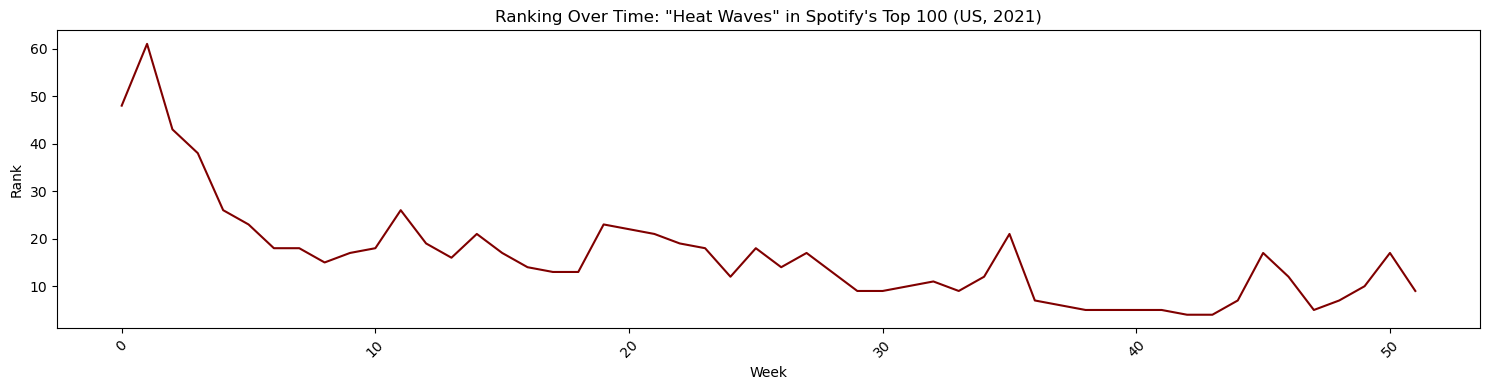

In [80]:
# Visualize the changes in the ranking of the song "Heat Waves" over time
plt.figure(figsize=(15, 4))
# Plot the 'rank' column from the 'heat_waves' DataFrame with a maroon color
plt.plot(heat_waves['rank'], color='maroon')
# Set the title of the plot
plt.title('Ranking Over Time: "Heat Waves" in Spotify\'s Top 100 (US, 2021)')
# Label the x-axis as 'Week'
plt.xlabel('Week')
# Label the y-axis as 'Rank'
plt.ylabel('Rank')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
# Adjust layout for better appearance
plt.tight_layout()
# Show the plot
plt.show()

Combining the selected data with the chart, we can find that the rank of the song "Heat Wave" drops to its lowest point at No.61 in the second week. Afterwards, it shows an upward trend, although it fluctuates, but generally stays in the 10-30 rankings. It is notable that in the weeks around week 40, the rank of the song "Heat Wave" rises to the Top 10.

Since the weekly rankings chart of the song “Heat Waves” is a bit messy, next we will modify it to Monthly Average Ranking.

In [81]:
# Calculate the monthly average ranking for the song "Heat Waves"
heat_waves['month'] = pd.to_datetime(heat_waves['date']).dt.to_period('M')
monthly_avg_rank = heat_waves.groupby('month')['rank'].mean().reset_index()

# Convert the 'Period' type to a string for better compatibility
monthly_avg_rank['month'] = monthly_avg_rank['month'].astype(str)

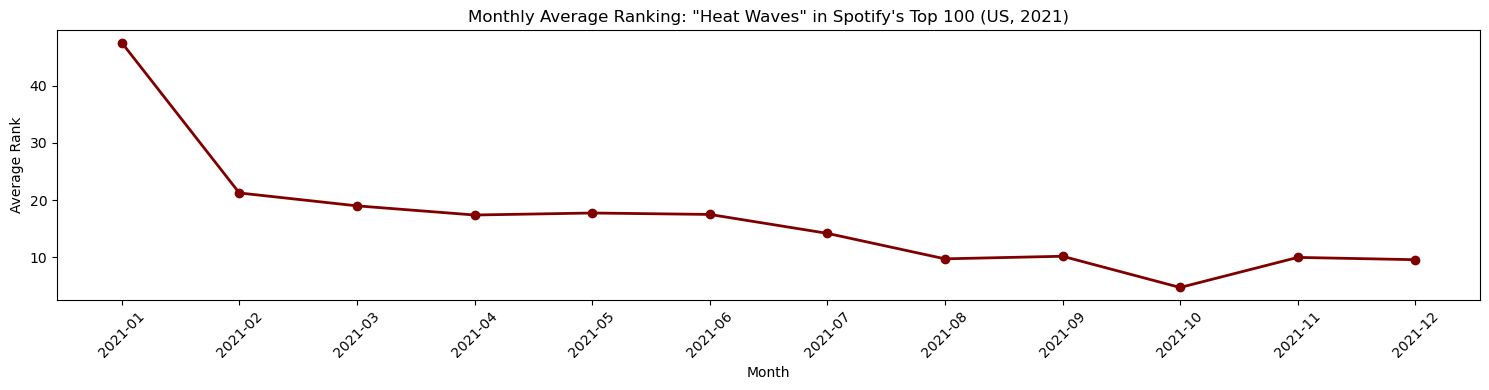

In [82]:
# Visualize the monthly average ranking of the song "Heat Waves"
plt.figure(figsize=(15, 4))
# Plot the monthly average ranking with maroon color, circular markers, solid line, and specified line properties
plt.plot(monthly_avg_rank['month'], monthly_avg_rank['rank'], color='maroon', marker='o', linestyle='-', linewidth=2, markersize=6)
# Set the title of the plot
plt.title('Monthly Average Ranking: "Heat Waves" in Spotify\'s Top 100 (US, 2021)')
# Label the x-axis as 'Month'
plt.xlabel('Month')
# Label the y-axis as 'Average Rank'
plt.ylabel('Average Rank')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
# Adjust layout for better appearance
plt.tight_layout()
# Show the plot
plt.show()

The monthly average ranking of the song "Heat Waves" is the lowest in January, at about the 40th place. From February to September, November to December, the monthly average ranking remained stable relatively, fluctuating between 10-20th place. In particular, the monthly average ranking peaked in the top 10 in October. Therefore, we can conclude that the rank of a song will chang over time on spotify.

#### (2) Billboard Platform

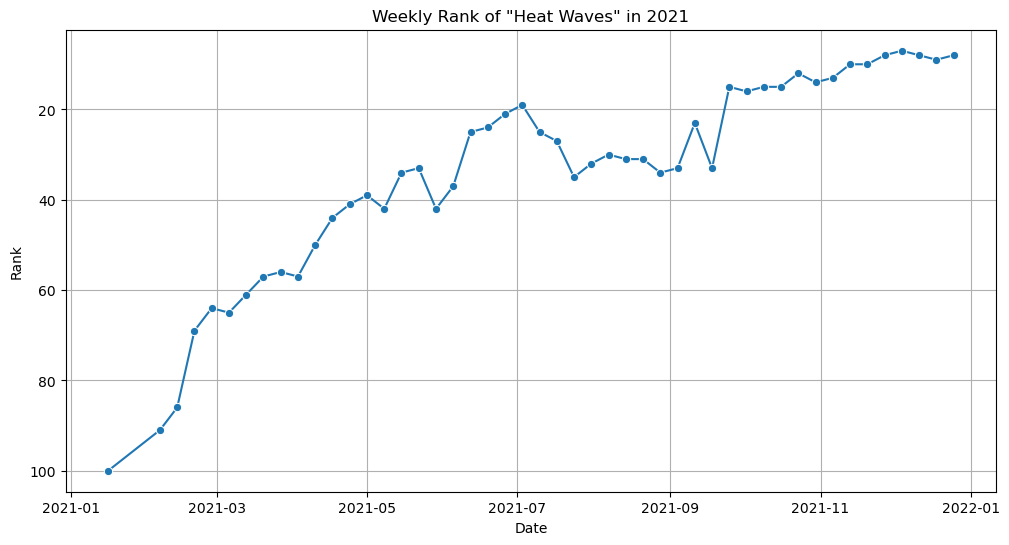

In [84]:
# Load the CSV file
file_path = 'C:/Users/dudud/collecting data/Group Project/2021_song_data/Billboard 2021.csv'
data = pd.read_csv(file_path)

# Filtering the data for the specified song
song_name = "Heat Waves"
song_data = data[data['song'] == song_name].copy()

# Convert date to datetime object for proper plotting
song_data['date'] = pd.to_datetime(song_data['date'])

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='rank', data=song_data, marker='o')
plt.gca().invert_yaxis()  # Invert y-axis as lower rank is better
plt.title(f'Weekly Rank of "{song_name}" in 2021')
plt.xlabel('Date')
plt.ylabel('Rank')
plt.grid(True)
plt.show()


In this chart,we can see how the rank of the same song changes over time on Billboard. Similarly, the song was prevalent throughout 2021 but is more prevalent towards the end of the year.